In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
df = pd.read_csv('2016-17_teamBoxScore_outcome_col_added.csv')
df.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,teamFTF,opptFTF,outcome
0,10/25/2016,8:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,NY,...,28.8922,0.4592,20.8951,2.0667,80.0000,100.3729,100.3729,0.229885,0.202128,0
1,10/25/2016,8:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,CLE,...,-28.8922,0.3478,12.9969,0.9444,33.3333,100.3729,99.9564,0.202128,0.229885,1
2,10/25/2016,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,UTA,...,9.7257,0.4699,18.3824,1.6923,38.4615,92.5380,92.1540,0.195122,0.293333,0
3,10/25/2016,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,POR,...,-9.7257,0.4444,15.5687,1.3571,64.2857,92.5380,92.9252,0.293333,0.195122,1
4,10/25/2016,10:30,Regular,Maddox,Tre,Fraher,Pat,Crawford,Dan,SA,...,-29.3592,0.4301,18.0560,1.5000,68.7500,98.7765,98.7765,0.265306,0.211765,1


In [3]:
target = df["outcome"]
target_names = ["loss", "win"]

In [4]:
df1 = df[['teamEFG%','opptEFG%', 'teamTO%', 'opptTO%', 'teamOREB%', 'teamDREB%', 'teamFTF', 'opptFTF', 'outcome']]
df1.head()

,teamEFG%,opptEFG%,teamTO%,opptTO%,teamOREB%,teamDREB%,teamFTF,opptFTF,outcome
0,0.4195,0.5479,15.8172,12.7812,24.5283,72.5000,0.229885,0.202128,0
1,0.5479,0.4195,12.7812,15.8172,27.5000,75.4717,0.202128,0.229885,1
2,0.5366,0.6067,13.5870,13.3088,17.1429,83.3333,0.195122,0.293333,0
3,0.6067,0.5366,13.3088,13.5870,16.6667,82.8571,0.293333,0.195122,1
4,0.5408,0.5118,11.3415,14.6897,43.7500,80.9524,0.265306,0.211765,1


In [5]:
data = df1.drop("outcome", axis=1)
feature_names = data.columns
data.head()

,teamEFG%,opptEFG%,teamTO%,opptTO%,teamOREB%,teamDREB%,teamFTF,opptFTF
0,0.4195,0.5479,15.8172,12.7812,24.5283,72.5000,0.229885,0.202128
1,0.5479,0.4195,12.7812,15.8172,27.5000,75.4717,0.202128,0.229885
2,0.5366,0.6067,13.5870,13.3088,17.1429,83.3333,0.195122,0.293333
3,0.6067,0.5366,13.3088,13.5870,16.6667,82.8571,0.293333,0.195122
4,0.5408,0.5118,11.3415,14.6897,43.7500,80.9524,0.265306,0.211765


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.463
k: 3, Train/Test Score: 0.751/0.498
k: 5, Train/Test Score: 0.687/0.483
k: 7, Train/Test Score: 0.678/0.532
k: 9, Train/Test Score: 0.655/0.519
k: 11, Train/Test Score: 0.650/0.512
k: 13, Train/Test Score: 0.640/0.514
k: 15, Train/Test Score: 0.637/0.507
k: 17, Train/Test Score: 0.631/0.504
k: 19, Train/Test Score: 0.634/0.511


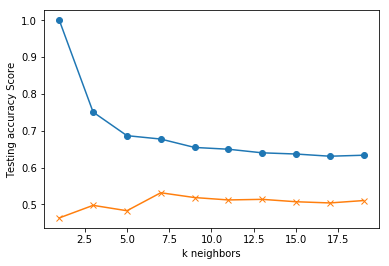

In [7]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [8]:
# Note that k: 7 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test, y_test))

k=7 Test Acc: 0.532
